# Direct comparison of original and extended Mon Jasnow 
---

In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7_r.get_mpl_colormap()
# plt.style.use('Solarize_Light2')
plt.style.use('default')
from time import time

## $\tau$ vs $T$

In [2]:
from mon_jasnow import get_tau_2

In [26]:
Tc = 2 /(np.log(1+np.sqrt(2)))          # Tc
N_size = 10
N_points =30                            # Number of Temperature points to check
T = np.linspace(0.1*Tc, 1.4*Tc, N_points)   # Temperature point list
N_sweeps = 10000                      
N_runs = 1
skips = 3

In [27]:
%time tau_mj, tau_ex = get_tau_2(N_size, N_sweeps, T, N_runs, skips)

Wall time: 13.7 s


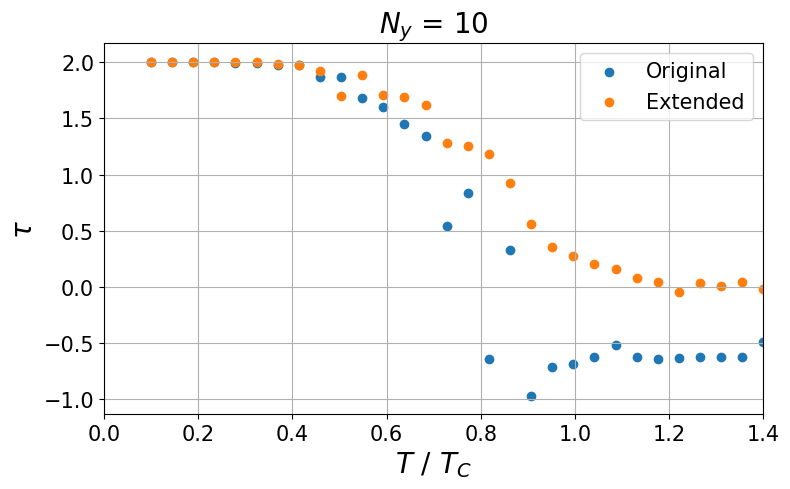

In [28]:
plt.figure(figsize=(8,5), tight_layout=True)
plt.scatter(T/Tc, tau_mj, label ='Original')
plt.scatter(T/Tc, tau_ex, label ='Extended') 
plt.xlim(0,1.4)
# plt.ylim(0,2.2)
plt.xlabel(fr"$T\ /\ T_C$", size=20)
plt.title(f"$N_y$ = {N_size}", size=20)
plt.ylabel(fr"$\tau$", size = 20)
plt.grid()
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)

# $\tau $ at $T=T_C$
---

In [4]:
Tc = 2 /(np.log(1+np.sqrt(2)))          # Tc
N_list  = np.arange(10, 50, dtype=int)
T = np.array([Tc])
N_sweeps = 100000
N_runs = 1
skips = 3

In [5]:
%%time
tau_tc = []
a = time()
for i, N in enumerate(N_list):
    tau = get_tau_2(N, N_sweeps, T, N_runs, skips)
    tau_tc.append(tuple([ta[0] for ta in tau]))
    print(i, f"Total time: {time()- a}s")
    
np.save(f"tau/tau_comparison_sweeps{N_sweeps}_skips{skips}", [tau_tc, N_list])
tau_tc = np.array(tau_tc)

0 Total time: 9.483695030212402s
1 Total time: 14.094960689544678s
2 Total time: 19.363869667053223s
3 Total time: 25.418672800064087s
4 Total time: 32.37309908866882s
5 Total time: 40.094921827316284s
6 Total time: 48.79875898361206s
7 Total time: 60.60713982582092s
8 Total time: 73.68318676948547s
9 Total time: 88.08666920661926s
10 Total time: 103.52348685264587s
11 Total time: 120.50905013084412s
12 Total time: 138.81067562103271s
13 Total time: 158.34841346740723s
14 Total time: 179.52480959892273s
15 Total time: 202.2350878715515s
16 Total time: 226.43731784820557s
17 Total time: 252.44574403762817s
18 Total time: 279.9031136035919s
19 Total time: 309.0053195953369s
20 Total time: 339.97169828414917s
21 Total time: 372.7400462627411s
22 Total time: 407.47688579559326s
23 Total time: 452.1664369106293s
24 Total time: 501.0458905696869s
25 Total time: 555.6727945804596s
26 Total time: 612.8917379379272s
27 Total time: 672.874242067337s
28 Total time: 732.8448941707611s
29 Total tim

In [31]:
cfs = np.polyfit(N_list, N*tau_tc[:,1], 1)
poly = np.poly1d(cfs)

Text(0.5, 1.0, '$T=T_C$')

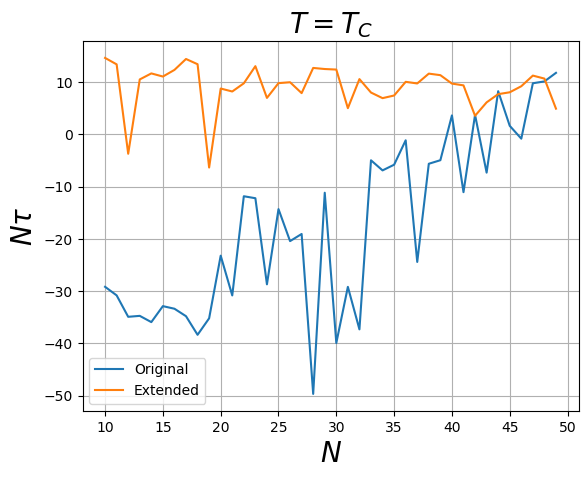

In [32]:
fig, ax = plt.subplots()
ax.plot(N_list, N*tau_tc[:,0], label='Original')
ax.plot(N_list, N*tau_tc[:,1], label ='Extended')
# ax.plot(N_list, poly(tau_tc[:,1]))
ax=plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.legend()
plt.grid()
plt.xlabel(fr"$N$", size=20)
plt.ylabel(fr"$N\tau$", size=20)
plt.title(fr"$T=T_C$", size=20)